<p style = "font-size : 50px; color : orange ; font-family : 'Comic Sans MS'; text-align : center; background-color : black ; border-radius: 5px 5px;"><strong>Brain MRI for Brain Tumor Detection: CNN</strong></p>

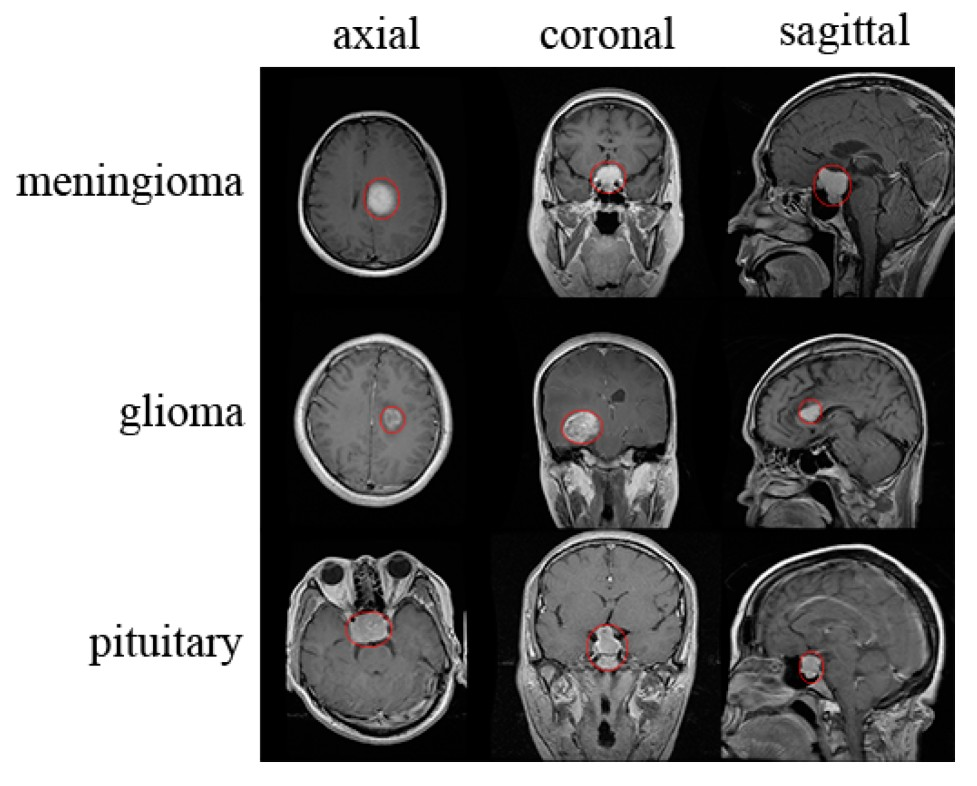

In [59]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import keras 
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from PIL import Image
import matplotlib.pyplot as plt
plt.style.use('dark_background')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder 
import tensorflow as tf
print(tf.__version__)

2.6.0


## One Hot Encoding the Target Classes

In [60]:
encoder = OneHotEncoder()
encoder.fit([[0], [1]]) 

# 0 - Tumor
# 1 - Normal

OneHotEncoder()

## Creating 3 Important Lists
* data list for storing image data in numpy array form
* paths list for storing paths of all images
* result list for storing one hot encoded form of target class whether normal or tumor

In [61]:
# This cell updates result list for images with tumor

data = []     #  image data in numpy format 
paths = []    #  This will contain Path of each and every image
result = []   #  Will contain my Target class 

### I am using for loop to walk into my data directory folder 
for r, d, f in os.walk(r'../input/brain-mri-images-for-brain-tumor-detection/yes'):
    for file in f:                                 ## f means folder as defined in above loop
        if '.jpg' in file:
            paths.append(os.path.join(r, file))   ### Will append path of this image (r is raw r'../i + photo address)

for path in paths:                                ### Gonna iterate through each and every path
    img = Image.open(path)                        ### Will read that image using pil library
    img = img.resize((128,128))                   ### Will resize it in 128,128, because I can't feed different size imag to the model (STANDARDIZED)
    img = np.array(img)                           ### Converting my image to numpy form 
    if(img.shape == (128,128,3)):                 ### If this image satisfy
        data.append(np.array(img))                ### append it to data
        result.append(encoder.transform([[0]]).toarray())     #### Add it with lable (result list)

In [62]:
# Now same thing for NO

paths = []
for r, d, f in os.walk(r"../input/brain-mri-images-for-brain-tumor-detection/no"):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[1]]).toarray())

In [63]:
data = np.array(data)
data.shape

(139, 128, 128, 3)

In [64]:
result = np.array(result)
result = result.reshape(139,2)

## Splitting the Data into Training & Testing

In [65]:
x_train,x_test,y_train,y_test = train_test_split(data, result, test_size=0.2, shuffle=True, random_state=0)

## Model Building
Batch normalization is a technique for training very deep neural networks that standardizes the inputs to a layer for each mini-batch. This has the effect of stabilizing the learning process and dramatically reducing the number of training epochs required to train deep networks.

In [66]:
%%time
model = Sequential()

model.add(Conv2D(32, kernel_size=(2, 2), input_shape=(128, 128, 3), padding = 'Same'))
model.add(Conv2D(32, kernel_size=(2, 2),  activation ='relu', padding = 'Same'))


model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))
model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
#model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(loss = "categorical_crossentropy", optimizer='Adamax', metrics=['accuracy'])
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 128, 128, 32)      416       
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 128, 128, 32)      4128      
_________________________________________________________________
batch_normalization_8 (Batch (None, 128, 128, 32)      128       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 64, 64, 64)        8256      
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 64, 64, 64)        16448     
_________________________________________________________________
batch_normalization_9 (Batch (None, 64, 64, 64)       

In [67]:
y_train.shape

(111, 2)

In [68]:
%%time
r = model.fit(x_train, y_train, epochs = 60, batch_size = 40, verbose = 1,validation_data = (x_test, y_test))

Epoch 1/60
3/3 [==============================] - 1s 121ms/step - loss: 15.8828 - accuracy: 0.6486 - val_loss: 10.6170 - val_accuracy: 0.7143
Epoch 2/60
3/3 [==============================] - 0s 42ms/step - loss: 7.2235 - accuracy: 0.7838 - val_loss: 19.3086 - val_accuracy: 0.6071
Epoch 3/60
3/3 [==============================] - 0s 42ms/step - loss: 2.3481 - accuracy: 0.8559 - val_loss: 4.7744 - val_accuracy: 0.7143
Epoch 4/60
3/3 [==============================] - 0s 43ms/step - loss: 0.9668 - accuracy: 0.9369 - val_loss: 6.8386 - val_accuracy: 0.7857
Epoch 5/60
3/3 [==============================] - 0s 42ms/step - loss: 0.1416 - accuracy: 0.9820 - val_loss: 9.5875 - val_accuracy: 0.7500
Epoch 6/60
3/3 [==============================] - 0s 43ms/step - loss: 0.4822 - accuracy: 0.9730 - val_loss: 14.1801 - val_accuracy: 0.6071
Epoch 7/60
3/3 [==============================] - 0s 43ms/step - loss: 1.3141 - accuracy: 0.9459 - val_loss: 5.7136 - val_accuracy: 0.7500
Epoch 8/60
3/3 [======

In [69]:
%%time
# Fit with data augmentation
# Note: if you run this AFTER calling the previous model.fit(), it will CONTINUE training where it left off
## this is valid for keras, if u call fit after training the data, then u are stating with already trained weights

batch_size = 32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(x_train, y_train, batch_size)
steps_per_epoch = x_train.shape[0] // batch_size
r2 = model.fit(train_generator, validation_data=(x_test, y_test), steps_per_epoch=steps_per_epoch, epochs=50)

Epoch 1/50
3/3 [==============================] - 1s 230ms/step - loss: 6.1535 - accuracy: 0.7215 - val_loss: 3.1474 - val_accuracy: 0.8571
Epoch 2/50
3/3 [==============================] - 0s 93ms/step - loss: 4.7805 - accuracy: 0.6962 - val_loss: 4.4108 - val_accuracy: 0.8929
Epoch 3/50
3/3 [==============================] - 0s 126ms/step - loss: 4.0957 - accuracy: 0.7812 - val_loss: 4.0862 - val_accuracy: 0.8571
Epoch 4/50
3/3 [==============================] - 0s 126ms/step - loss: 2.8451 - accuracy: 0.6962 - val_loss: 3.1508 - val_accuracy: 0.8929
Epoch 5/50
3/3 [==============================] - 0s 133ms/step - loss: 3.0250 - accuracy: 0.8021 - val_loss: 2.7047 - val_accuracy: 0.8571
Epoch 6/50
3/3 [==============================] - 0s 126ms/step - loss: 2.1930 - accuracy: 0.7812 - val_loss: 3.2816 - val_accuracy: 0.8929
Epoch 7/50
3/3 [==============================] - 0s 91ms/step - loss: 2.2678 - accuracy: 0.8481 - val_loss: 3.4250 - val_accuracy: 0.8929
Epoch 8/50
3/3 [======

## Plotting Losses and Accuracy Graph

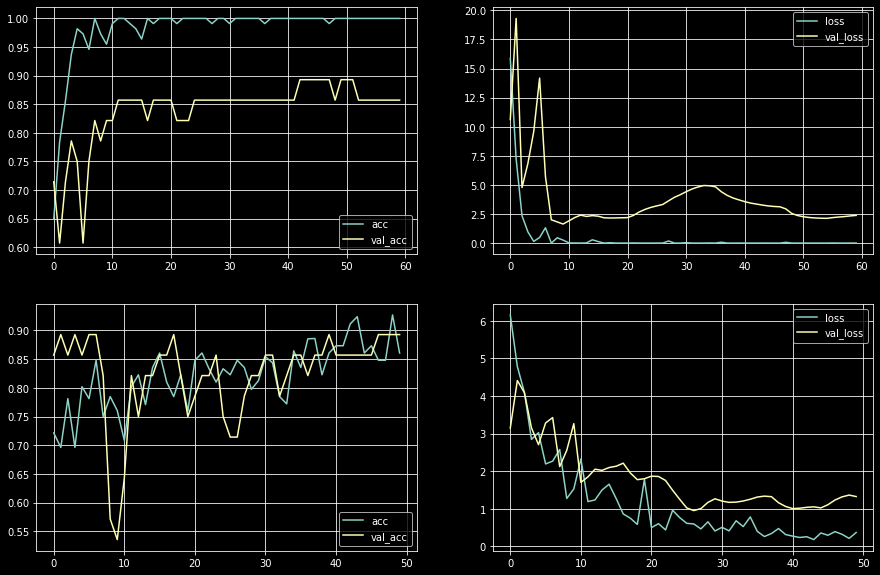

In [70]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
# Plot accuracy per iteration
plt.grid(True)
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

plt.subplot(2,2,2)
# Plot loss per iteration
plt.grid(True)
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

plt.subplot(2,2,3)
# Plot accuracy per iteration
plt.grid(True)
plt.plot(r2.history['accuracy'], label='acc')
plt.plot(r2.history['val_accuracy'], label='val_acc')
plt.legend()

plt.subplot(2,2,4)
# Plot loss per iteration
plt.grid(True)
import matplotlib.pyplot as plt
plt.plot(r2.history['loss'], label='loss')
plt.plot(r2.history['val_loss'], label='val_loss')
plt.legend()

# Checking the Model

In [72]:
def names(number):
    if number==0:
        return 'Its a Tumor'
    else:
        return 'No, Its not a tumor'

99.88681077957153% Confidence This Is No, Its not a tumor


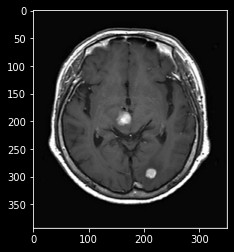

In [73]:
from matplotlib.pyplot import imshow
img = Image.open(r"../input/brain-mri-images-for-brain-tumor-detection/no/N17.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence This Is ' + names(classification))

99.97710585594177% Confidence This Is A Its a Tumor


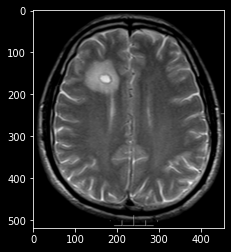

In [74]:
from matplotlib.pyplot import imshow
img = Image.open(r"../input/brain-mri-images-for-brain-tumor-detection/yes/Y3.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence This Is A ' + names(classification))